# Beyond Basic Analytics: Elevate Your Analysis with Mixed Models!
### Explore how Mixed Linear Models empower you to analyze complex, grouped data with confidence, revealing hidden patterns and making more accurate predictions

In [ ]:
# pip install statsmodels pandas numpy matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)



# Dataset
#### Imagine you're a data scientist working for a new educational app. You want to see if using the app for more hours improves students' math scores. You collect data from several schools, and within each school, you track multiple students over a few months. 

In [ ]:
# We'll have 3 schools
n_schools = 3
# Each school will have a slightly different "baseline" score
school_baselines = np.random.normal(loc=[60, 65, 70], scale=3, size=n_schools)

# Data for 10 students per school
students_per_school = 10
total_students = n_schools * students_per_school

# Create lists to store our data
student_ids = []
school_ids = []
app_hours = []
math_scores = []

for school_id in range(n_schools):
    for student_idx in range(students_per_school):
        student_ids.append(f'S_{school_id}_{student_idx}')
        school_ids.append(f'School_{school_id}')

        # Simulate app hours (e.g., between 1 and 10 hours)
        hours = np.random.uniform(1, 10)
        app_hours.append(hours)

        # Base score from school + effect of app hours + individual noise
        score = (
            school_baselines[school_id]
            + (hours * 2) 
            + np.random.normal(0, 5) 
        )
        math_scores.append(score)

# Create a DataFrame
df = pd.DataFrame({
    'student_id': student_ids,
    'school_id': school_ids,
    'app_hours': app_hours,
    'math_score': math_scores
})

print("First 5 rows of our simulated data:")
print(df)
print("\nDescriptive stats per school:")
print(df.groupby('school_id')['math_score'].mean())



First 5 rows of our simulated data:
   student_id school_id  app_hours  math_score
0       S_0_0  School_0   2.404168   73.913627
1       S_0_1  School_0   2.403951   74.194108
2       S_0_2  School_0   1.185260   67.697837
3       S_0_3  School_0   9.729189   78.601148
4       S_0_4  School_0   2.636425   69.475792
5       S_0_5  School_0   2.650641   68.001235
6       S_0_6  School_0   4.887505   61.698752
7       S_0_7  School_0   3.621062   63.668111
8       S_0_8  School_0   3.629302   70.319983
9       S_0_9  School_0   4.297257   77.412899
10      S_1_0  School_1   2.797064   69.050454
11      S_1_1  School_1   5.628110   73.119513
12      S_1_2  School_1   6.467904   78.075627
13      S_1_3  School_1   2.534717   66.651448
14      S_1_4  School_1   7.158097   77.442933
15      S_1_5  School_1   4.961372   74.440466
16      S_1_6  School_1   1.309497   61.915646
17      S_1_7  School_1   9.183884   87.065699
18      S_1_8  School_1   3.805400   66.091788
19      S_1_9  School_1 

# Simple Linear Regression Model

In [5]:
# --- Now, let's run a simple linear regression and see what happens ---

# Define the independent variable (X) and dependent variable (y)
X = df['app_hours']
y = df['math_score']

# Add a constant to the independent variable for the intercept term in the regression
X = sm.add_constant(X)

# Create and fit the OLS (Ordinary Least Squares) model
simple_model = sm.OLS(y, X)
simple_results = simple_model.fit()

print("\n--- Simple Linear Regression Results (Ignoring Schools) ---")
print(simple_results.summary())


--- Simple Linear Regression Results (Ignoring Schools) ---
                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     24.88
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           2.87e-05
Time:                        18:12:49   Log-Likelihood:                -96.110
No. Observations:                  30   AIC:                             196.2
Df Residuals:                      28   BIC:                             199.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

# Mixed Linear Model

In [ ]:
# print("Our simulated data preview (first 5 rows):\n", df)
print("\nMean math score per school (for context):\n", df.groupby('school_id')['math_score'].mean())

print("\n--- Fitting the Mixed Linear Model (Random Intercept) ---")

# The formula: "outcome ~ fixed_effects"
# The `groups` argument: specifies our random effect grouping variable
model = smf.mixedlm("math_score ~ app_hours", df, groups=df["school_id"])

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())


Mean math score per school (for context):
 school_id
School_0    70.498349
School_1    72.315908
School_2    82.451036
Name: math_score, dtype: float64

--- Fitting the Mixed Linear Model (Random Intercept) ---
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: math_score
No. Observations: 30      Method:             REML      
No. Groups:       3       Scale:              17.9413   
Min. group size:  10      Log-Likelihood:     -87.3013  
Max. group size:  10      Converged:          Yes       
Mean group size:  10.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     66.043    3.488 18.935 0.000 59.207 72.879
app_hours      1.964    0.309  6.363 0.000  1.359  2.570
Group Var     28.638    7.463                           



# Testing the models

In [ ]:
# --- Fit the Simple Linear Regression (OLS) Model ---
X_ols = df['app_hours']
y_ols = df['math_score']
X_ols = sm.add_constant(X_ols) # Add constant for intercept
simple_model = sm.OLS(y_ols, X_ols)
simple_results = simple_model.fit()

# --- Fit the Mixed Linear Model (Random Intercept) ---
mixed_model = smf.mixedlm("math_score ~ app_hours", df, groups=df["school_id"])
mixed_results = mixed_model.fit()

print("Models fitted. Now for the comparison!\n")


# Let's pick the first student from School_0 (Student S_0_0)
sample_student = df[df['student_id'] == 'S_0_6'].iloc[0]

print(f"--- Sample Student Selected ---")
print(f"Student ID: {sample_student['student_id']}")
print(f"School ID: {sample_student['school_id']}")
print(f"App Hours: {sample_student['app_hours']:.2f}")
print(f"Actual Math Score: {sample_student['math_score']:.2f}\n")


# Get coefficients from OLS model
ols_intercept = simple_results.params['const']
ols_app_hours_coef = simple_results.params['app_hours']

ols_predicted_score = ols_intercept + (ols_app_hours_coef * sample_student['app_hours'])

print(f"--- Simple Linear Regression Prediction ---")
print(f"OLS Intercept: {ols_intercept:.3f}")
print(f"OLS app_hours Coef: {ols_app_hours_coef:.3f}")
print(f"OLS Predicted Score: {ols_predicted_score:.2f}\n")


# Get fixed effects coefficients from MLM
mlm_fixed_intercept = mixed_results.params['Intercept']
mlm_fixed_app_hours_coef = mixed_results.params['app_hours']

# The mixed_results.random_effects attribute gives us the BLUPs
school_0_random_intercept_deviation = mixed_results.random_effects[sample_student['school_id']]

mlm_predicted_score = (
    mlm_fixed_intercept + school_0_random_intercept_deviation
) + (mlm_fixed_app_hours_coef * sample_student['app_hours'])

print(f"--- Mixed Linear Model Prediction ---")
print(f"MLM Fixed Intercept: {mlm_fixed_intercept:.3f}")
print(f"MLM Fixed app_hours Coef: {mlm_fixed_app_hours_coef:.3f}")
print(f"Random Intercept Deviation for School_0 ({sample_student['school_id']}): {school_0_random_intercept_deviation}")
print(f"MLM Predicted Score: {mlm_predicted_score}\n")


print(f"--- Comparison ---")
print(f"Actual Math Score:          {sample_student['math_score']}")
print(f"OLS Predicted Score:        {ols_predicted_score} (Error: {abs(sample_student['math_score'] - ols_predicted_score)})")
print(f"MLM Predicted Score:        {mlm_predicted_score} (Error: {abs(sample_student['math_score'] - mlm_predicted_score)})")



Models fitted. Now for the comparison!

--- Sample Student Selected ---
Student ID: S_0_6
School ID: School_0
App Hours: 4.89
Actual Math Score: 61.70

--- Simple Linear Regression Prediction ---
OLS Intercept: 65.054
OLS app_hours Coef: 2.179
OLS Predicted Score: 75.70

--- Mixed Linear Model Prediction ---
MLM Fixed Intercept: 66.043
MLM Fixed app_hours Coef: 1.964
Random Intercept Deviation for School_0 (School_0): Group   -2.729265
dtype: float64
MLM Predicted Score: Group    72.914798
dtype: float64

--- Comparison ---
Actual Math Score:          61.69875157130279
OLS Predicted Score:        75.70481221754598 (Error: 14.006060646243185)
MLM Predicted Score:        Group    72.914798
dtype: float64 (Error: Group    11.216047
dtype: float64)


# Visual comparison of both models

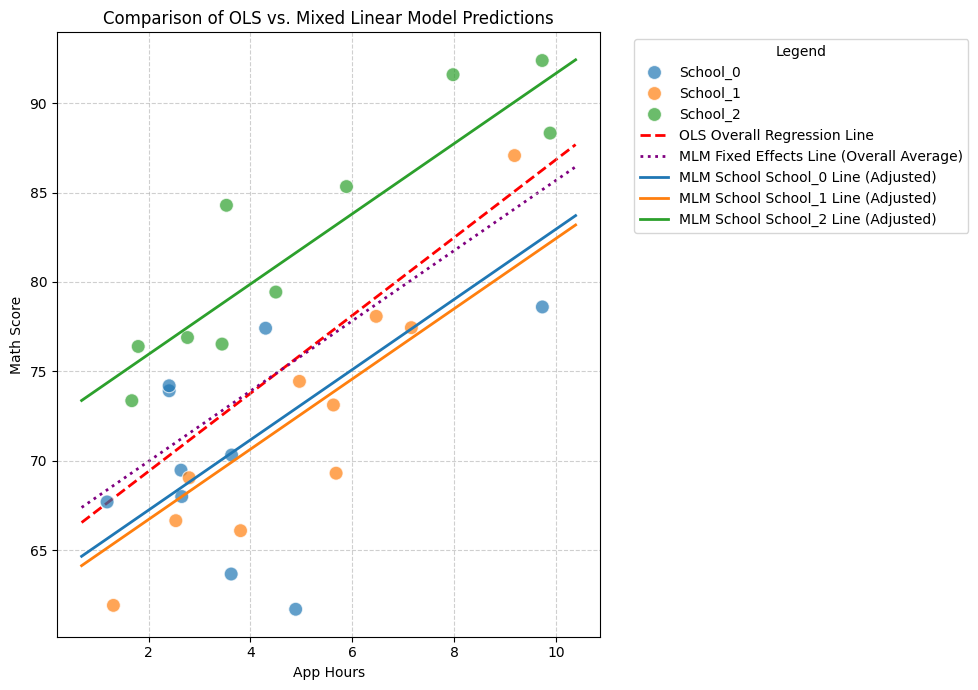


--- Visual Interpretation ---
1. **Data Points:** Each colored point represents a student, with colors indicating their school.
2. **OLS Overall Regression Line (Red Dashed):** This single line represents the best fit of the simple linear regression. Notice how it tries to capture the average trend across *all* students, ignoring the school groupings.
3. **MLM Fixed Effects Line (Purple Dotted):** This line represents the effect of the fixed predictors (intercept + app_hours) *without* the random effect adjustments. It's the overall average line predicted by the MLM if schools didn't vary.
4. **MLM School-Specific Regression Lines (Solid Lines, Colored by School):** These are the true power of the Mixed Model. Each school has its *own* parallel regression line. These lines are essentially the 'MLM Fixed Effects Line' shifted up or down by that school's specific random intercept ($u_j$).
   - Notice how the solid lines (MLM) generally fit their respective colored clusters of points muc

In [19]:
X_ols = df['app_hours']
y_ols = df['math_score']
X_ols_const = sm.add_constant(X_ols)
simple_model = sm.OLS(y_ols, X_ols_const)
simple_results = simple_model.fit()

# --- Fit the Mixed Linear Model (Random Intercept) ---
mixed_model = smf.mixedlm("math_score ~ app_hours", df, groups=df["school_id"])
mixed_results = mixed_model.fit()

# --- Prepare data for plotting ---
# Create a range of app_hours for smooth regression lines
x_range = np.linspace(df['app_hours'].min() - 0.5, df['app_hours'].max() + 0.5, 100)

# 1. OLS Predicted Line
# Ensure these are scalars
ols_intercept = simple_results.params['const'].item()
ols_app_hours_coef = simple_results.params['app_hours'].item()
df_plot = pd.DataFrame({'app_hours': x_range})
df_plot['ols_predicted'] = ols_intercept + (ols_app_hours_coef * df_plot['app_hours'])

# 2. MLM Predicted Lines (Fixed Effects + Random Intercepts)
# Ensure these are scalars
mlm_fixed_intercept = mixed_results.params['Intercept'].item()
mlm_fixed_app_hours_coef = mixed_results.params['app_hours'].item()

# Get the individual random intercepts (BLUPs) for each school. This is a Pandas Series.
school_random_intercepts = mixed_results.random_effects

# Create predictions for each school based on MLM
mlm_lines_data = []
for school_id in df['school_id'].unique(): # Iterate unique school_ids
    # Extract the random effect for the current school_id as a scalar
    u_j = school_random_intercepts[school_id].item() # Use .item() here too!

    school_baseline = mlm_fixed_intercept + u_j

    # All components should now be pure scalars or a NumPy array (x_range)
    # So this calculation should proceed without Pandas index alignment issues.
    predicted_scores = school_baseline + (mlm_fixed_app_hours_coef * x_range)

    mlm_lines_data.append(pd.DataFrame({
        'app_hours': x_range,
        'predicted_score': predicted_scores,
        'school_id': school_id
    }))
df_mlm_lines = pd.concat(mlm_lines_data)


# --- Plotting ---
plt.figure(figsize=(10, 7))

# Plot raw data points, colored by school
sns.scatterplot(data=df, x='app_hours', y='math_score', hue='school_id',
                palette='tab10', s=100, alpha=0.7, zorder=2) # Legend created here

# Plot OLS Regression Line
plt.plot(df_plot['app_hours'], df_plot['ols_predicted'], color='red', linestyle='--',
         linewidth=2, label='OLS Overall Regression Line', zorder=1)

# Plot MLM Fixed Effects Line (The average line if no random effects were there)
mlm_average_line = mlm_fixed_intercept + (mlm_fixed_app_hours_coef * df_plot['app_hours'])
plt.plot(df_plot['app_hours'], mlm_average_line, color='purple', linestyle=':',
         linewidth=2, label='MLM Fixed Effects Line (Overall Average)', zorder=1)

# Plot MLM Regression Lines for each school
palette = sns.color_palette('tab10', n_schools)
school_colors = {f'School_{i}': palette[i] for i in range(n_schools)}

for school_id in df['school_id'].unique():
    subset = df_mlm_lines[df_mlm_lines['school_id'] == school_id]
    plt.plot(subset['app_hours'], subset['predicted_score'],
             color=school_colors[school_id], linestyle='-', linewidth=2,
             label=f'MLM School {school_id} Line (Adjusted)') # Explicit label

plt.title('Comparison of OLS vs. Mixed Linear Model Predictions')
plt.xlabel('App Hours')
plt.ylabel('Math Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout()
plt.show()

print("\n--- Visual Interpretation ---")
print("1. **Data Points:** Each colored point represents a student, with colors indicating their school.")
print("2. **OLS Overall Regression Line (Red Dashed):** This single line represents the best fit of the simple linear regression. Notice how it tries to capture the average trend across *all* students, ignoring the school groupings.")
print("3. **MLM Fixed Effects Line (Purple Dotted):** This line represents the effect of the fixed predictors (intercept + app_hours) *without* the random effect adjustments. It's the overall average line predicted by the MLM if schools didn't vary.")
print("4. **MLM School-Specific Regression Lines (Solid Lines, Colored by School):** These are the true power of the Mixed Model. Each school has its *own* parallel regression line. These lines are essentially the 'MLM Fixed Effects Line' shifted up or down by that school's specific random intercept ($u_j$).")
print("   - Notice how the solid lines (MLM) generally fit their respective colored clusters of points much better than the single OLS line.")
print("   - For example, if 'School_0' (likely blue/orange/green, depending on palette) tends to have lower scores, its MLM line will be shifted downwards, providing a more accurate baseline prediction for students in that school.")
print("   - The fact that these lines are parallel demonstrates that the *slope* (effect of app hours) is assumed to be the same across all schools in this specific random intercept model.")
print("\nThis visualization clearly shows how the Mixed Linear Model provides a more nuanced and accurate fit by accounting for the inherent grouping structure in the data, offering specific baseline predictions for each school while still estimating a general effect of app usage.")

# Generating plot for Simple Linear Regression

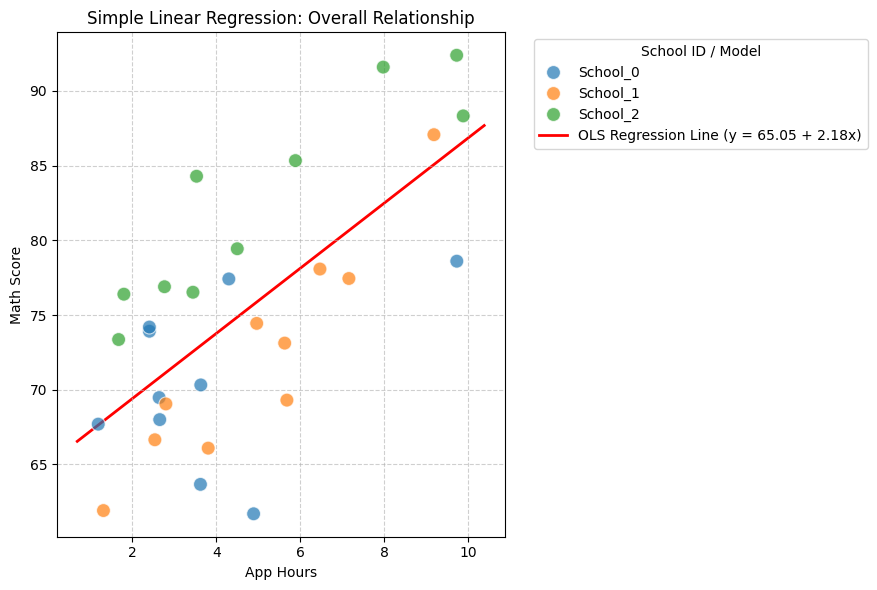


--- OLS Model Coefficients ---
Intercept (OLS): 65.054
App Hours Coefficient (OLS): 2.179

This plot shows a single line representing the average relationship between app hours and math scores across all students, without accounting for which school they attend.


In [ ]:
X_ols = df['app_hours']
y_ols = df['math_score']
# Add a constant term to the predictor for the intercept
X_ols_const = sm.add_constant(X_ols)
simple_model = sm.OLS(y_ols, X_ols_const)
simple_results = simple_model.fit()

# Get the coefficients
ols_intercept = simple_results.params['const']
ols_app_hours_coef = simple_results.params['app_hours']

# Create a range of app_hours values to draw a smooth line
x_line = np.linspace(df['app_hours'].min() - 0.5, df['app_hours'].max() + 0.5, 100)
# Calculate predicted math scores across this range using the OLS equation
y_predicted_ols = ols_intercept + (ols_app_hours_coef * x_line)


plt.figure(figsize=(9, 6))


sns.scatterplot(data=df, x='app_hours', y='math_score', hue='school_id',
                palette='tab10', s=100, alpha=0.7, zorder=2, legend='full')

# Plot the Simple Linear Regression line
plt.plot(x_line, y_predicted_ols, color='red', linestyle='-', linewidth=2,
         label=f'OLS Regression Line (y = {ols_intercept:.2f} + {ols_app_hours_coef:.2f}x)',
         zorder=1)

# Add titles and labels
plt.title('Simple Linear Regression: Overall Relationship')
plt.xlabel('App Hours')
plt.ylabel('Math Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='School ID / Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n--- OLS Model Coefficients ---")
print(f"Intercept (OLS): {ols_intercept:.3f}")
print(f"App Hours Coefficient (OLS): {ols_app_hours_coef:.3f}")
print("\nThis plot shows a single line representing the average relationship between app hours and math scores across all students, without accounting for which school they attend.")

# Conclusion
#### Traditional analytical methods can lead to incomplete or misleading conclusions due to the growing complexity of data. Mixed Linear Models provide rigor for understanding grouped data, moving beyond superficial observations to profound relationships. Integrating these techniques improves current insights and future-proofs analytical capabilities, ensuring confidence and accuracy in complex datasets.